In [42]:
# import libraries
import pandas as pd
pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# import the files
data = open("./dataset/breast-cancer.data")
feat = open("./dataset/breast-cancer.names")

data = data.read()
feat = feat.read()

In [44]:
# preview the first two rows of the dataset
print(data.split('\n',1)[0])
print(data.split('\n',2)[1])

no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no


In [45]:
# view information about the dataset
print(feat)

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   -- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
      Ljubljana, Yugoslavia
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 11 July 1988

3. Past Usage: (Several: here are some)
     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The 
        Multi-Purpose Incremental Learning System AQ15 and its Testing 
        Application to Three Medical Domains.  In Proceedings of the 
        Fifth National Conference on Artificial Intelligence, 1041-1045,
        Philadelphia, PA: Morgan Kaufmann.
        -- accuracy range: 66%-72%
     -

In [46]:
# replace missing dataset attributes to NAN
data = data.replace('?','')

In [47]:
from io import StringIO

In [48]:
# convert data from str to dataframe
data = StringIO(data)
data = pd.read_csv(data, sep=",")
print(type(data)) #check the data variable is a pandas.core.frame.DataFrame

<class 'pandas.core.frame.DataFrame'>


In [49]:
data.columns = ['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']
data.columns

Index(['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrad'],
      dtype='object')

In [50]:
data['class'] = data['class'].replace(['no-recurrence-events','recurrence-events'], [0,1])
data['age'] = data['age'].replace(['20-29', '30-39','40-49','50-59','60-69','70-79'],[0,1,2,3,4,5])
data['menopause'] = data['menopause'].replace(['premeno','ge40','lt40'],[0,1,2])
data['tumour_size'] = data['tumour_size'].replace(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],[0,1,2,3,4,5,6,7,8,9,10])
data['inv_nodes'] = data['inv_nodes'].replace(['0-2','3-5','6-8','9-11','12-14','15-17','24-26'],[0,1,2,3,4,5,6])
data['node_caps'] = data['node_caps'].replace(['no','yes'],[0,1])
data['breast'] = data['breast'].replace(['left','right'],[0,1])
data['breast_quad'] = data['breast_quad'].replace(['left_low','left_up','right_up','right_low','central'],[0,1,2,3,4])
data['irrad'] = data['irrad'].replace(['no','yes'],[0,1])

In [51]:
# replace missing data 
data['node_caps'] = data['node_caps'].fillna(5)
data['breast_quad'] = data['breast_quad'].fillna(8)

In [52]:
X = data.drop(['class'], axis = 1)
y = data[['class']]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [54]:
X_train.shape

(228, 9)

In [55]:
y_train.shape

(228, 1)

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 214 to 250
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          228 non-null    int64  
 1   menopause    228 non-null    int64  
 2   tumour_size  228 non-null    int64  
 3   inv_nodes    228 non-null    int64  
 4   node_caps    228 non-null    float64
 5   deg_malig    228 non-null    int64  
 6   breast       228 non-null    int64  
 7   breast_quad  228 non-null    float64
 8   irrad        228 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 17.8 KB


In [57]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 214 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   228 non-null    int64
dtypes: int64(1)
memory usage: 3.6 KB


<AxesSubplot: ylabel='class'>

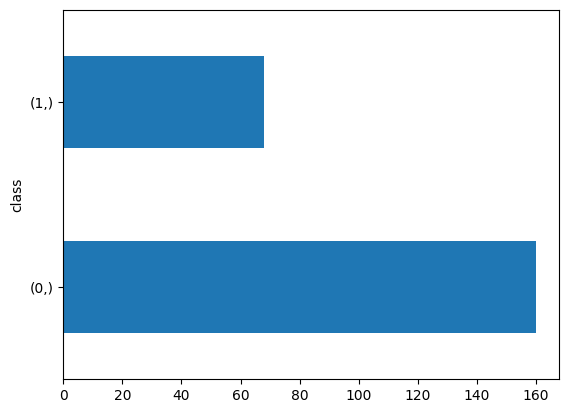

In [58]:
class_ = y_train.value_counts()
class_.plot.barh()

- target class is unbalanced
- in general, 10.4% is the rate of breast cancer recurrence after 5 years from the initial cancer. Unbalanced may be representative of real-world situation
- type of errors in real-world deployment of the model:
  - false negatives: failing to detect likely recurrence *"patient won't experience recurrence but likely will"*
  - false positives: marking recurrence when patient likely won't *"patient will experience recurrence, but likely won't"*
  - damaging: false negatives > false positives
- cost-sensitive model that is designed to prioritize recall over precision may be more appropriate
  - *cost-sensitive model: "takes into account consequences of different types of errors when making predictions"*
  - *recall: "ability to detect all instances of the disease"*
  - *precision: "correctly identify positive instances"*
  - *F1-score: "a mix of precision and recall. Good when the target class is unbalanced"*
  <br>
  <br>
- several options:
  - try to evaluate the model using appropriate evaluation metrics
    - F1-score, ROC-AUC
  - model a cost-sensitive model that prioritizes recall over precision and test the model again
  - balance the target class using sampling methods

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\Premiere2022-PC1\AppData\Local\Temp\ipykernel_11488\1251377444.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
model.score(X_train, y_train)

0.9868421052631579

In [61]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='binary')
print('using f1 score:',f1)

using f1 score: 0.42424242424242425


In [62]:
model = RandomForestClassifier(class_weight="balanced_subsample")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\Premiere2022-PC1\AppData\Local\Temp\ipykernel_11488\2976720635.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [63]:

model.score(X_train, y_train)

0.9868421052631579

In [64]:

f1 = f1_score(y_test, y_pred, average='binary')
print('cost-sensitive prioritizing recall:',f1)

cost-sensitive prioritizing recall: 0.45161290322580644


In [65]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

<AxesSubplot: ylabel='class'>

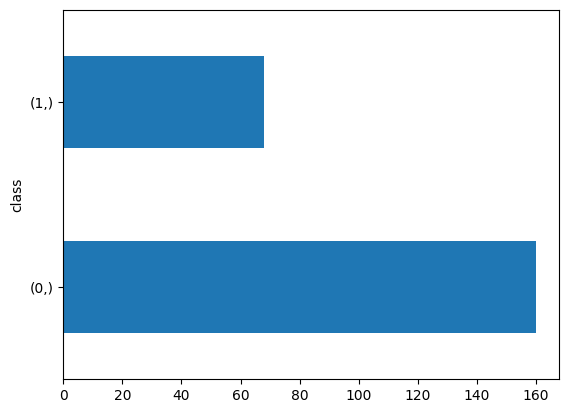

In [66]:
class_ = y_train.value_counts()
class_.plot.barh()

<AxesSubplot: ylabel='class'>

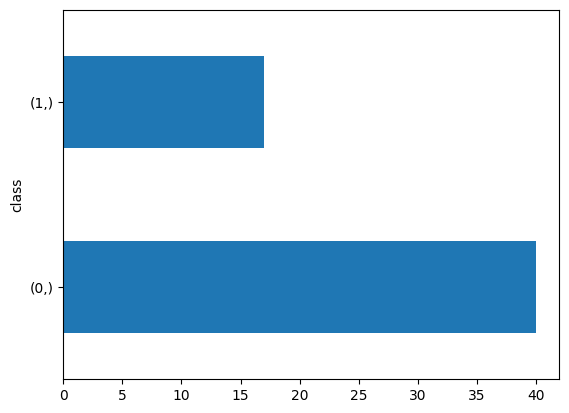

In [67]:
class_ = y_test.value_counts()
class_.plot.barh()

<AxesSubplot: ylabel='class'>

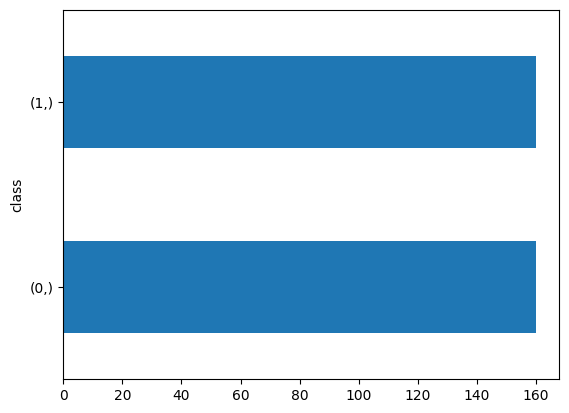

In [68]:
class_ = y_resampled.value_counts()
class_.plot.barh()

In [69]:
model = RandomForestClassifier()

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

C:\Users\Premiere2022-PC1\AppData\Local\Temp\ipykernel_11488\1463639332.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled, y_resampled)


In [70]:
f1 = f1_score(y_test, y_pred, average='binary')

print('resampling to balanced:',f1)

resampling to balanced: 0.4117647058823529


In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\Premiere2022-PC1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [72]:
model.score(X_train, y_train)

0.7412280701754386

In [73]:
f1 = f1_score(y_test, y_pred, average='binary')
print('using f1 score:',f1)

using f1 score: 0.5161290322580646


In [74]:
model = LogisticRegression(class_weight={0: 1, 1: 2})
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\Premiere2022-PC1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [75]:
model.score(X_train, y_train)

0.706140350877193

In [76]:
f1 = f1_score(y_test, y_pred, average='binary')
print('cost-sensitive prioritizing recall:',f1)

cost-sensitive prioritizing recall: 0.48780487804878053


In [77]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

<AxesSubplot: ylabel='class'>

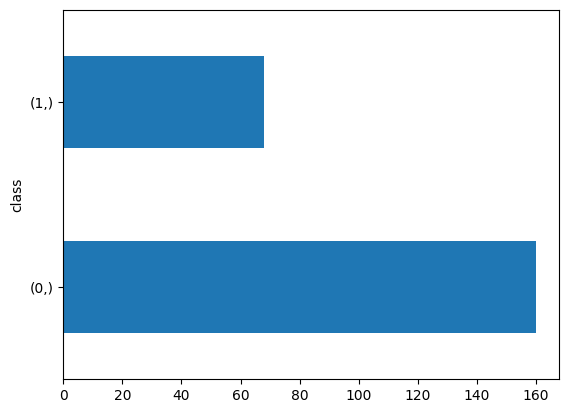

In [78]:
class_ = y_train.value_counts()
class_.plot.barh()

<AxesSubplot: ylabel='class'>

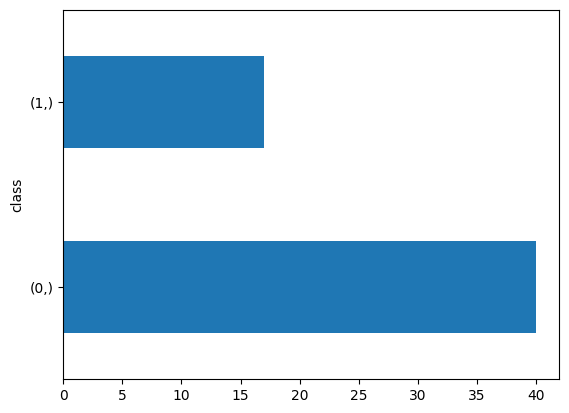

In [79]:
class_ = y_test.value_counts()
class_.plot.barh()

<AxesSubplot: ylabel='class'>

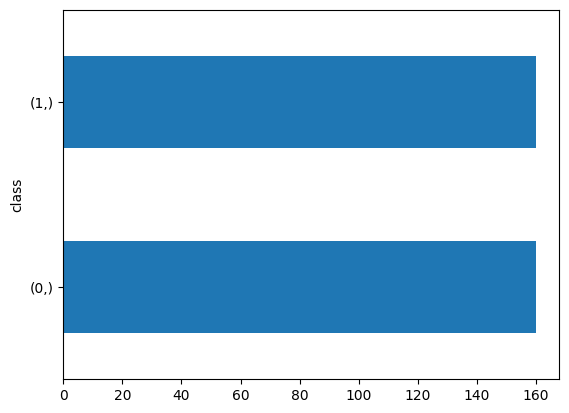

In [80]:
class_ = y_resampled.value_counts()
class_.plot.barh()

In [81]:
model = LogisticRegression()

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

C:\Users\Premiere2022-PC1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
f1 = f1_score(y_test, y_pred, average='binary')

print('resampling to balanced:',f1)

resampling to balanced: 0.5


In [83]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\Premiere2022-PC1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [84]:
model.score(X_train, y_train)

0.7368421052631579

In [85]:
f1 = f1_score(y_test, y_pred, average='binary')
print('using f1 score:',f1)

using f1 score: 0.4666666666666667


In [86]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [87]:
model = GaussianNB()

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

C:\Users\Premiere2022-PC1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
f1 = f1_score(y_test, y_pred, average='binary')

print('resampling to balanced:',f1)

resampling to balanced: 0.4666666666666667
